<a href="https://colab.research.google.com/github/alchemistklk/pytorch_tutorial/blob/master/04_pytorch_custom_data_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Data

## 0.Importing PyTorch and device-agnostic code

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

## 1.Get Data

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} has existed")
else:
  print(f"{image_path} doesn't exist")
  image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(image_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data")
  f.write(request.content)
# Unzip data
with zipfile.ZipFile(image_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)

data/pizza_steak_sushi has existed


## 2.Become one with data(data preparation)

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its cintents
  Args:
    dir_path: target directory
  Return:
    A print out of:
    number of subdirectories in dir_path
    number of images in each subdirectories
    name of each subdirecotry
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 1 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 visualize an image

Radom image path:data/pizza_steak_sushi/test/pizza/194643.jpg
image class:pizza
image height:512
image width:382


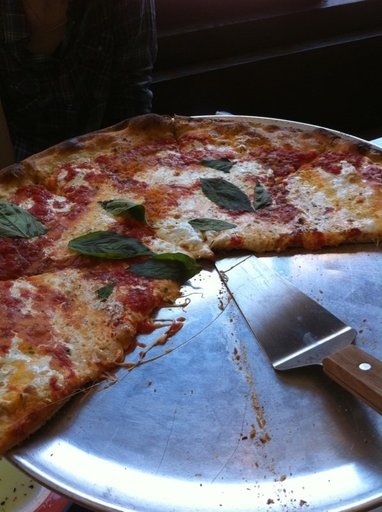

In [ ]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
random_image = Image.open(random_image_path)

print(f"Radom image path:{random_image_path}")
print(f"image class:{image_class}")
print(f"image height:{random_image.height}")
print(f"image width:{random_image.width}")
random_image

Image class:pizza|Image height:512|Image width382


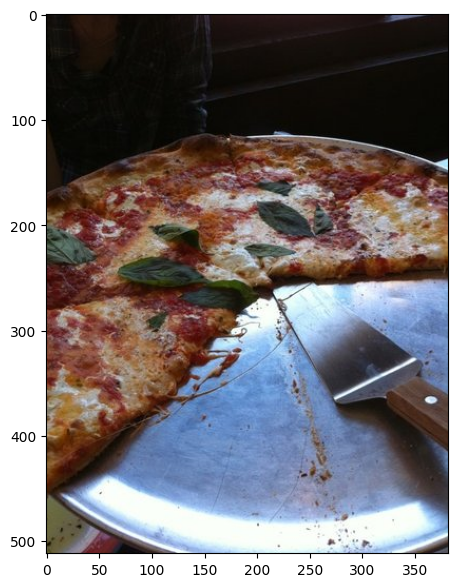

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_numpy = np.asarray(random_image)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_numpy)
print(f"Image class:{image_class}|Image height:{random_image.height}|Image width{random_image.width}")

## 3.Transforming the data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_tranform = transforms.Compose([
    # Resize
    transforms.Resize(size=(64, 64)),
    # Flip randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Convert to tensor
    transforms.ToTensor()
])


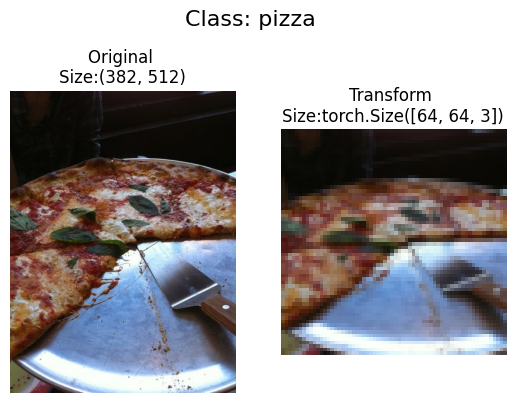

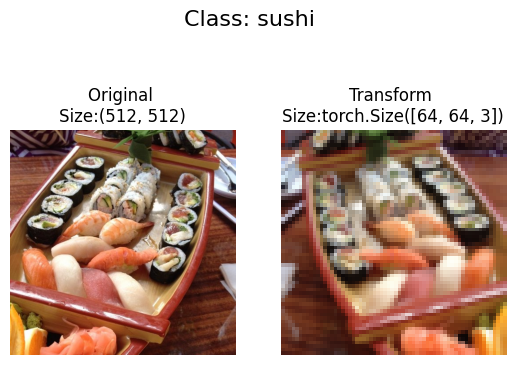

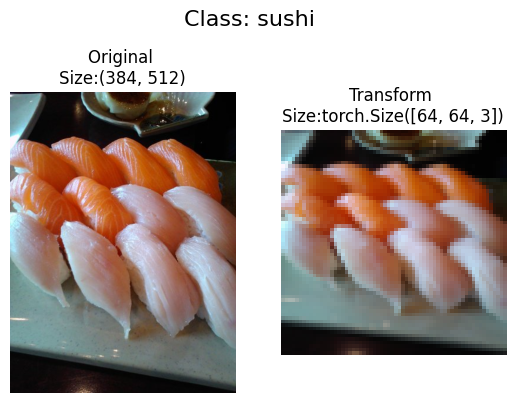

In [ ]:
def plot_transformed_images(image_path, transform, n=3, seed=42):
  random.seed(seed)
  random_image_paths = random.sample(image_path, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize:{f.size}")
      ax[0].axis(False)

      transform_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transform_image)
      ax[1].set_title(f"Transform \nSize:{transform_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, data_tranform)
